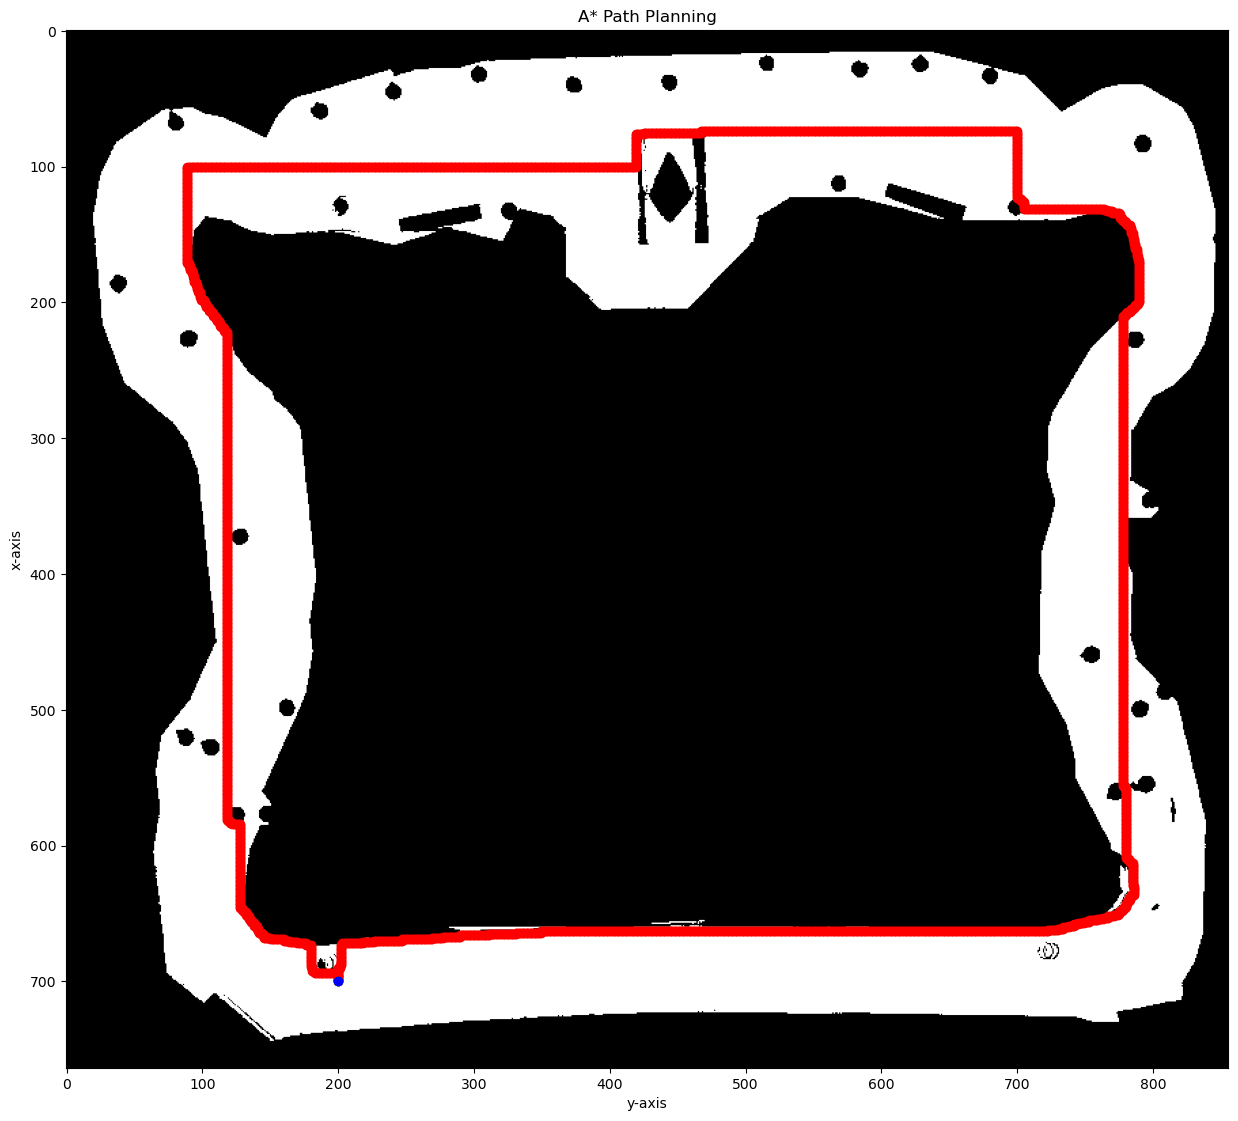

Path coordinates saved to path_coordinates_A_star.csv


In [1]:
import numpy as np
import heapq
import matplotlib.pyplot as plt
import csv

class Node:
    def __init__(self, position, parent=None):
        self.position = position
        self.parent = parent
        self.g = 0  
        self.h = 0  
        self.f = 0  

    def __eq__(self, other):
        return self.position == other.position

    def __lt__(self, other):
        return self.f < other.f

def heuristic(a, b):
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

def astar(grid, start, goal):
    directions = [(0, 1), (1, 0), (0, -1), (-1, 0)]
    open_list = []
    closed_list = set()
    heapq.heappush(open_list, (0 + heuristic(start, goal), 0, start, None))
    g_costs = {start: 0}
    came_from = {start: None}
    
    while open_list:
        _, current_cost, current, parent = heapq.heappop(open_list)
        
        if current in closed_list:
            continue
        
        closed_list.add(current)
        came_from[current] = parent
        
        if current == goal:
            break
        
        for direction in directions:
            neighbor = (current[0] + direction[0], current[1] + direction[1])
            if 0 <= neighbor[0] < grid.shape[0] and 0 <= neighbor[1] < grid.shape[1]:
                if grid[neighbor[0], neighbor[1]] == 0 and neighbor not in closed_list:
                    if is_collision_free(grid, current, neighbor):
                        move_cost = np.sqrt(direction[0]**2 + direction[1]**2)
                        tentative_g_cost = current_cost + move_cost
                        if neighbor not in g_costs or tentative_g_cost < g_costs[neighbor]:
                            g_costs[neighbor] = tentative_g_cost
                            f_cost = tentative_g_cost + heuristic(neighbor, goal)
                            heapq.heappush(open_list, (f_cost, tentative_g_cost, neighbor, current))
    
    path = []
    node = goal
    while node is not None:
        path.append(node)
        node = came_from.get(node)
        if node is None:
            break
    path.reverse()
    
    if path and path[0] == start:
        return path
    else:
        print(f"No path found from {start} to {goal}")
        return []

def is_collision_free(grid, start, end):
    x0, y0 = start
    x1, y1 = end
    
    if abs(x1 - x0) == 1 and abs(y1 - y0) == 1:
        if grid[x0, y1] == 1 or grid[x1, y0] == 1:
            return False
    
    return True

def visualize_path(grid, path, start, goal):
    plt.figure(figsize=(15, 15))
    plt.imshow(grid, cmap='Greys', origin='upper')
    for point in path:
        plt.plot(point[1], point[0], 'ro')
    plt.plot(start[1], start[0], 'go')
    plt.plot(goal[1], goal[0], 'bo')
    plt.title("A* Path Planning")
    plt.xlabel('y-axis')
    plt.ylabel('x-axis')
    plt.show()

def navigate_with_waypoints(grid, start, waypoints):
    full_path = []
    current_start = start
    for waypoint in waypoints:
        path_segment = astar(grid, current_start, waypoint)
        if not path_segment:
            print(f"Skipping segment from {current_start} to {waypoint} due to no path found.")
            continue
        full_path.extend(path_segment[:-1])   
        current_start = waypoint
    full_path.append(waypoints[-1])   
    return full_path

 
file_path = r'C:\Users\boddu\Downloads\map_soc_walls_3_modified_converted.npy'
grid = np.load(file_path)

start = (700, 200)
waypoints = [(700, 200), (100, 200), (100,700), (700,200)]
path = navigate_with_waypoints(grid, start, waypoints)
visualize_path(grid, path, start, waypoints[-1])


def save_path_to_csv(path, filename):
    with open(filename, mode='w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(["x", "y"])
        for point in path:
            writer.writerow(point)
 
path_filename = 'path_coordinates_A_star.csv'
save_path_to_csv(path, path_filename)
print(f"Path coordinates saved to {path_filename}")


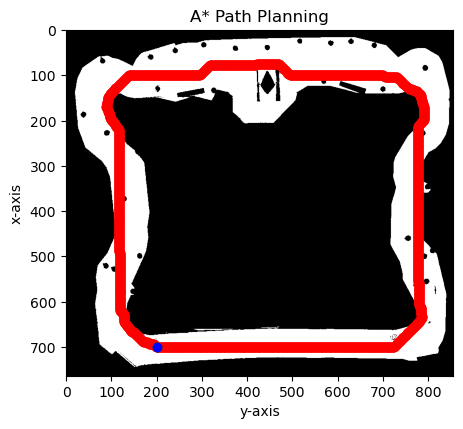

Time taken for path planning: 7.332265615463257 seconds
Path coordinates saved to C:\Users\boddu\Downloads\path_coordinates_A_star.csv


In [2]:
import numpy as np
import heapq
import matplotlib.pyplot as plt
import csv
import time

class Node:
    def __init__(self, position, parent=None):
        self.position = position
        self.parent = parent
        self.g = 0   
        self.h = 0   
        self.f = 0   

    def __eq__(self, other):
        return self.position == other.position

    def __lt__(self, other):
        return self.f < other.f

def heuristic(a, b):
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

def astar(grid, start, goal):
    directions = [(0, 1), (1, 0), (0, -1), (-1, 0), (-1,1), (1,1), (1,-1), (-1,-1)]
    open_list = []
    closed_list = set()
    heapq.heappush(open_list, (0 + heuristic(start, goal), 0, start, None))
    g_costs = {start: 0}
    came_from = {start: None}
    
    while open_list:
        _, current_cost, current, parent = heapq.heappop(open_list)
        
        if current in closed_list:
            continue
        
        closed_list.add(current)
        came_from[current] = parent
        
        if current == goal:
            break
        
        for direction in directions:
            neighbor = (current[0] + direction[0], current[1] + direction[1])
            if 0 <= neighbor[0] < grid.shape[0] and 0 <= neighbor[1] < grid.shape[1]:
                if grid[neighbor[0], neighbor[1]] == 0 and neighbor not in closed_list:
                    if is_collision_free(grid, current, neighbor):
                        move_cost = np.sqrt(direction[0]**2 + direction[1]**2)
                        tentative_g_cost = current_cost + move_cost
                        if neighbor not in g_costs or tentative_g_cost < g_costs[neighbor]:
                            g_costs[neighbor] = tentative_g_cost
                            f_cost = tentative_g_cost + heuristic(neighbor, goal)
                            heapq.heappush(open_list, (f_cost, tentative_g_cost, neighbor, current))
    
    path = []
    node = goal
    while node is not None:
        path.append(node)
        node = came_from.get(node)
        if node is None:
            break
    path.reverse()
    
    if path and path[0] == start:
        return path
    else:
        print(f"No path found from {start} to {goal}")
        return []

def is_collision_free(grid, start, end):
    x0, y0 = start
    x1, y1 = end
    
    if abs(x1 - x0) == 1 and abs(y1 - y0) == 1:
        if grid[x0, y1] == 1 or grid[x1, y0] == 1:
            return False
    
    return True

def visualize_path(grid, path, start, goal):
    plt.figure(figsize=(5, 5))
    plt.imshow(grid, cmap='Greys', origin='upper')
    for point in path:
        plt.plot(point[1], point[0], 'ro')
    plt.plot(start[1], start[0], 'go')
    plt.plot(goal[1], goal[0], 'bo')
    plt.title("A* Path Planning")
    plt.xlabel('y-axis')
    plt.ylabel('x-axis')
    plt.show()

def navigate_with_waypoints(grid, start, waypoints):
    full_path = []
    current_start = start
    for waypoint in waypoints:
        path_segment = astar(grid, current_start, waypoint)
        if not path_segment:
            print(f"Skipping segment from {current_start} to {waypoint} due to no path found.")
            continue
        full_path.extend(path_segment[:-1])   
        current_start = waypoint
    full_path.append(waypoints[-1])   
    return full_path

def save_path_to_csv(path, filename):
    with open(filename, mode='w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(["x", "y"])
        for point in path:
            writer.writerow(point)

 
file_path = r'C:\Users\boddu\Downloads\map_soc_walls_3_modified_converted.npy'
grid = np.load(file_path)

start = (700, 200)
waypoints = [(700, 200), (100, 200), (100,700), (700,200)]
path = navigate_with_waypoints(grid, start, waypoints)
visualize_path(grid, path, start, waypoints[-1])

start_time = time.time()
path = navigate_with_waypoints(grid, start, waypoints)
end_time = time.time()
execution_time = end_time - start_time
print(f"Time taken for path planning: {execution_time} seconds")


path_filename = r'C:\Users\boddu\Downloads\path_coordinates_A_star.csv'
save_path_to_csv(path, path_filename)
print(f"Path coordinates saved to {path_filename}")
